In [1]:
# init SparkContext
from pyspark import SparkContext
sc = SparkContext('local', 'K-means')

In [10]:
# load data from csv file
data_rdd = sc.textFile('../data/digits.csv') \
             .map(lambda line: (line.split(',', 1)[0],
                                list(map(float, line.split(',')[1:]))))

('0', [0.0, 0.0, 5.0, 13.0, 9.0, 1.0, 0.0, 0.0, 0.0, 0.0, 13.0, 15.0, 10.0, 15.0, 5.0, 0.0, 0.0, 3.0, 15.0, 2.0, 0.0, 11.0, 8.0, 0.0, 0.0, 4.0, 12.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 5.0, 8.0, 0.0, 0.0, 9.0, 8.0, 0.0, 0.0, 4.0, 11.0, 0.0, 1.0, 12.0, 7.0, 0.0, 0.0, 2.0, 14.0, 5.0, 10.0, 12.0, 0.0, 0.0, 0.0, 0.0, 6.0, 13.0, 10.0, 0.0, 0.0, 0.0])


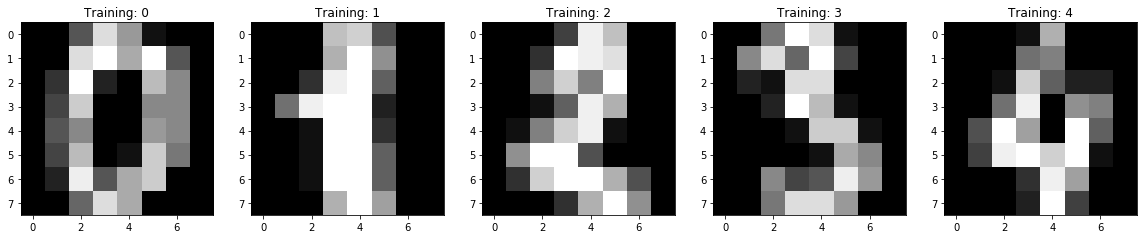

In [3]:
# display sample data
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

sample = data_rdd.take(5)
print(sample[0])

fig = plt.figure(figsize=(20, 10))
for i, (y, x) in enumerate(sample, 1):
    subplot = fig.add_subplot(1, len(sample), i)
    plt.imshow(np.array(x).reshape((8, 8)), cmap='gray');
    subplot.set_title('Training: %s' % y);

In [14]:
from pyspark.sql import Row
from pyspark.sql import SparkSession
from pyspark.ml.linalg import Vectors

spark = SparkSession.builder.getOrCreate()

data = spark.createDataFrame(
    data_rdd.map(lambda e: Row(label=e[0], 
                               features=Vectors.dense(e[1]))))

In [15]:
data.show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[0.0,0.0,5.0,13.0...|    0|
|[0.0,0.0,0.0,12.0...|    1|
|[0.0,0.0,0.0,4.0,...|    2|
|[0.0,0.0,7.0,15.0...|    3|
|[0.0,0.0,0.0,1.0,...|    4|
|[0.0,0.0,12.0,10....|    5|
|[0.0,0.0,0.0,12.0...|    6|
|[0.0,0.0,7.0,8.0,...|    7|
|[0.0,0.0,9.0,14.0...|    8|
|[0.0,0.0,11.0,12....|    9|
|[0.0,0.0,1.0,9.0,...|    0|
|[0.0,0.0,0.0,0.0,...|    1|
|[0.0,0.0,5.0,12.0...|    2|
|[0.0,2.0,9.0,15.0...|    3|
|[0.0,0.0,0.0,8.0,...|    4|
|[0.0,5.0,12.0,13....|    5|
|[0.0,0.0,0.0,8.0,...|    6|
|[0.0,0.0,1.0,8.0,...|    7|
|[0.0,0.0,10.0,7.0...|    8|
|[0.0,0.0,6.0,14.0...|    9|
+--------------------+-----+
only showing top 20 rows



In [16]:
from pyspark.ml.feature import StandardScaler

# TODO: preprocess data: scale and center to zero

scaler = StandardScaler(withMean=True, 
                        inputCol="features",
                        outputCol="centered")

scale_model = scaler.fit(data)

data_scaled = scale_model.transform(data)

In [17]:
data_scaled.show()

+--------------------+-----+--------------------+
|            features|label|            centered|
+--------------------+-----+--------------------+
|[0.0,0.0,5.0,13.0...|    0|[0.0,-0.334923258...|
|[0.0,0.0,0.0,12.0...|    1|[0.0,-0.334923258...|
|[0.0,0.0,0.0,4.0,...|    2|[0.0,-0.334923258...|
|[0.0,0.0,7.0,15.0...|    3|[0.0,-0.334923258...|
|[0.0,0.0,0.0,1.0,...|    4|[0.0,-0.334923258...|
|[0.0,0.0,12.0,10....|    5|[0.0,-0.334923258...|
|[0.0,0.0,0.0,12.0...|    6|[0.0,-0.334923258...|
|[0.0,0.0,7.0,8.0,...|    7|[0.0,-0.334923258...|
|[0.0,0.0,9.0,14.0...|    8|[0.0,-0.334923258...|
|[0.0,0.0,11.0,12....|    9|[0.0,-0.334923258...|
|[0.0,0.0,1.0,9.0,...|    0|[0.0,-0.334923258...|
|[0.0,0.0,0.0,0.0,...|    1|[0.0,-0.334923258...|
|[0.0,0.0,5.0,12.0...|    2|[0.0,-0.334923258...|
|[0.0,2.0,9.0,15.0...|    3|[0.0,1.8696814886...|
|[0.0,0.0,0.0,8.0,...|    4|[0.0,-0.334923258...|
|[0.0,5.0,12.0,13....|    5|[0.0,5.1765886097...|
|[0.0,0.0,0.0,8.0,...|    6|[0.0,-0.334923258...|


In [18]:
from pyspark.ml.clustering import KMeans

# TODO: cluster data using KMeans
kmeans = KMeans(k=10, maxIter=20,
               featuresCol="centered", 
               predictionCol="prediction")

kmeans_model = kmeans.fit(data_scaled)

In [22]:
# TODO: examine model summary: kmeans_model.summary
print(kmeans_model.summary.clusterSizes)

[171, 177, 401, 150, 314, 37, 9, 75, 458, 5]


In [23]:
# TODO: get prediction using kmeans_model.transform
prediction_frame = kmeans_model.transform(data_scaled)

In [24]:
prediction_frame.show()

+--------------------+-----+--------------------+----------+
|            features|label|            centered|prediction|
+--------------------+-----+--------------------+----------+
|[0.0,0.0,5.0,13.0...|    0|[0.0,-0.334923258...|         4|
|[0.0,0.0,0.0,12.0...|    1|[0.0,-0.334923258...|         8|
|[0.0,0.0,0.0,4.0,...|    2|[0.0,-0.334923258...|         8|
|[0.0,0.0,7.0,15.0...|    3|[0.0,-0.334923258...|         2|
|[0.0,0.0,0.0,1.0,...|    4|[0.0,-0.334923258...|         4|
|[0.0,0.0,12.0,10....|    5|[0.0,-0.334923258...|         2|
|[0.0,0.0,0.0,12.0...|    6|[0.0,-0.334923258...|         0|
|[0.0,0.0,7.0,8.0,...|    7|[0.0,-0.334923258...|         8|
|[0.0,0.0,9.0,14.0...|    8|[0.0,-0.334923258...|         2|
|[0.0,0.0,11.0,12....|    9|[0.0,-0.334923258...|         2|
|[0.0,0.0,1.0,9.0,...|    0|[0.0,-0.334923258...|         4|
|[0.0,0.0,0.0,0.0,...|    1|[0.0,-0.334923258...|         8|
|[0.0,0.0,5.0,12.0...|    2|[0.0,-0.334923258...|         7|
|[0.0,2.0,9.0,15.0...|  

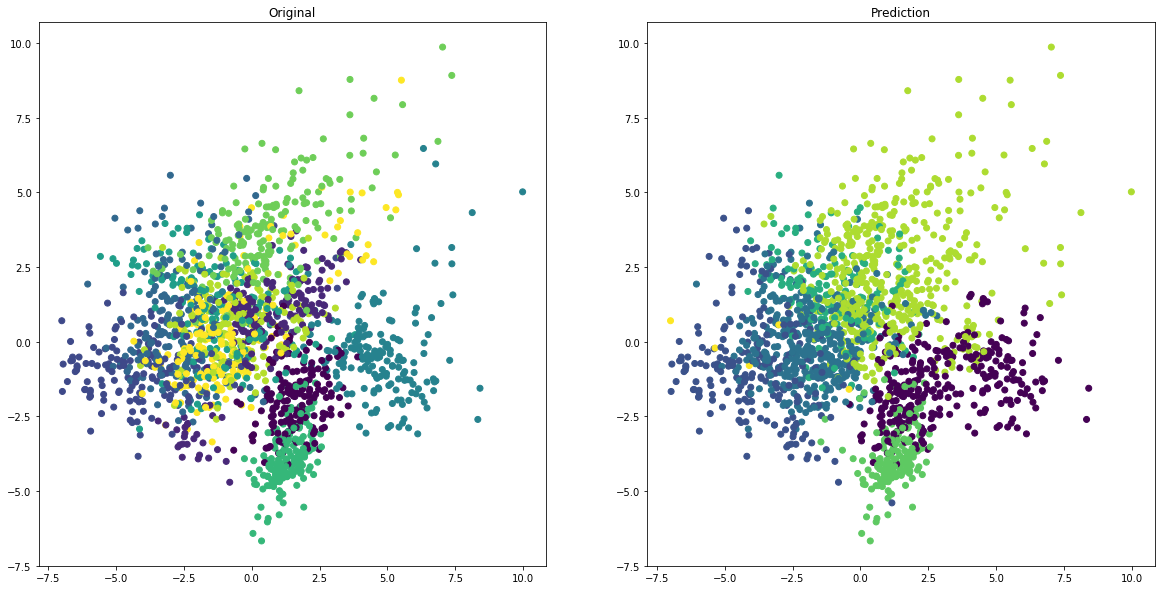

In [26]:
# visualize results
%matplotlib inline
import matplotlib.pyplot as plt

from itertools import groupby
from operator import itemgetter
from collections import Counter

from sklearn.decomposition import PCA

# predict cluster labels and load results to driver program
prediction = prediction_frame.select('prediction',
                                     'label', 
                                     'centered').collect()

X = np.array([cluster_label_x[2] for cluster_label_x in prediction])
clusters = [cluster_label_x[0] for cluster_label_x in prediction]
labels = [cluster_label_x[1] for cluster_label_x in prediction]

# reduce feature space dimention
X_reduced = PCA(n_components=2).fit_transform(X)

# map prediction to original labels
cluster_to_label = dict((c, Counter(map(itemgetter(1), v)).most_common()[0][0])
                        for c, v in groupby(sorted(zip(clusters, labels)),
                                            key=itemgetter(0)))

clusters = [cluster_to_label[cluster] for cluster in clusters]

# show results
fig = plt.figure(figsize=(20, 10))

subplot = fig.add_subplot(1, 2, 1)
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=labels);
subplot.set_title('Original');

subplot = fig.add_subplot(1, 2, 2)
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=clusters);
subplot.set_title('Prediction');

In [28]:
# compute cost
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Return the K-means cost (sum of squared distances of points to their nearest center)
# for this model on the given data.
print('K-Means cost: %s' % kmeans_model.computeCost(data_scaled))

print(confusion_matrix(labels, clusters))
print('Accuracy score: %.3f' % accuracy_score(labels, clusters))

K-Means cost: 72287.9938049889
[[176   0   0   1   0   0   1   0   0   0]
 [  0   0  28   7   0   2   0 144   1   0]
 [  0   0 153   6   0   1   0  16   1   0]
 [  0   0  12 154   0   5   0  11   1   0]
 [130   0   0   0   0   3   0  48   0   0]
 [  3   0  15  38   0 124   2   0   0   0]
 [  4   0   1   0   0   0 174   2   0   0]
 [  0   0   8   0   0   2   0 169   0   0]
 [  1   0   8  51   0  30   2  80   2   0]
 [  0   0   0 144   0  10   1  25   0   0]]
Accuracy score: 0.530
